# Aula56_novoarquivo_python

In [ ]:
import pandas as pd
dados = pd.read_csv("../dados_54.csv")
print(dados.columns)


#dados para retirar, o price que era para treinar e o índice 'Unnamed: 0'

#'Unnamed: 0'
#'price'
#quero criar uma lista de colunas
colunas=list(dados.columns)[1:-1]
print(colunas)
display(dados.head())
#na hora de salvar, o ideal é comentar todos os display e colunas

In [ ]:
import streamlit as st
import joblib

In [ ]:
# passo as caractéristicas de um imóvel no site para carregar o modelo e fazer a previsão
#tkinter, site no flask ou no streamlit

In [ ]:
#!pip install joblib

In [ ]:
#!pip install streamlit


In [ ]:
#carregando o modelo
# para não ficar rodando o treino do modelo toda hora 
# pois para rodar utiliza muita a memória
# modelo = joblib.load('modelo.joblib')
# por meio de um link, vamos fazer a busca dos resultados mais coerentes

In [ ]:
Colunas0 = ['host_listings_count', 'host_is_superhost', 'latitude', 'longitude',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price',
       'extra_people', 'minimum_nights', 'instant_bookable', 'ano', 'mes',
       'n_amenities', 'property_type_Apartment',
       'property_type_Bed and breakfast', 'property_type_Condominium',
       'property_type_Guest suite', 'property_type_Guesthouse',
       'property_type_Hostel', 'property_type_House', 'property_type_Loft',
       'property_type_Outros', 'property_type_Serviced apartment',
       'room_type_Entire home/apt', 'room_type_Hotel room',
       'room_type_Private room', 'room_type_Shared room',
       'cancellation_policy_flexible', 'cancellation_policy_moderate',
       'cancellation_policy_strict',
       'cancellation_policy_strict_14_with_grace_period']

# inicializar com 0 os dicionários
#listas que eu criei, os que forem apenas números, caractéristicas x que são numéricos
       
x_numericos = {'latitude': 0, 'longitude': 0, 
               'accommodates': 0, 'bathrooms': 0, 'bedrooms': 0, 'beds': 0, 'extra_people': 0,
               'minimum_nights': 0, 'ano': 0, 'mes': 0, 'n_amenities': 0, 
               'host_listings_count': 0}


# o que são verdadeiro ou falso
x_tf = {  'host_is_superhost':0,
          'instant_bookable':0}

# já os que são listas, faço de outro modo, as propriedades, quero que seja um caso só
# os valores dos dicinários serão uma lista, para criar botões
x_listas = {'property_type': ['Apartment', 'Bed and breakfast', 'Condominium', 'Guest suite',
                              'Guesthouse', 'Hostel', 'House', 'Loft', 'Outros', 'Serviced apartment'],
            'room_type': ['Entire home/apt', 'Hotel room', 'Private room', 'Shared room'],
            'cancellation_policy': ['flexible', 'moderate', 'strict', 'strict_14_with_grace_period']
            }


#depois no final do código transformo o dicionário em dataframe

#precisa de um dicionário para o site interno
#criar um novo dicionário

#exemplo
#dicionario = {'property_type_Apartment':0, 'property_type_Bed and breakfast' :0, 'room_type_Entire home/apt':0}
#dentro do valor no selectbox
#valor campo item com o valor e muda de 0 para 1 , 'property_type_Apartment': na hora de selecionar

In [ ]:
#dicionário auxiliar
dicionario ={}
for item in x_listas:
    #item -> é a chave do dicionário
    # x_listas[item] é o valor que está armazenado na chave do dicionário
    # x_listas['property_type'] -> é a lista do property_type   
    print(item)
    for valor in x_listas[item]:
        print(valor)
        dicionario[f'{item}_{valor}'] =0 

print(dicionario)
#só que no final do programa eu coloco 1, pois foi selecionado no site

In [ ]:

for item in x_numericos:
    print(item)
    if item =='latitude' or item == 'longitude':
        #valor = st.number_input(f'{item}', step => quando em quanto ele varia (1 única unidade)
        #, value =>valor padrão que ele vai começar, coloquei em float neste caso
        # format em 5 casas decimais %.5f , quero formatar com 5 casas decimais)  
        valor = st.number_input(f'{item}', step =0.00001, value=0.0, format ="%.5f")  
    elif item == 'extra_people':
        #neste caso duas casas decimais, por padrão já vem como formato de duas casas decimais. 
        valor = st.number_input(f'{item}', step =0.01, value=0.0, format ="%.2f")  
    else:   
        #st do streamlit, valor do campo numérico no site
        #mesmo dando o valor value igual a zero, ele já vem como padrão
       # valor = st.number_input(f'{item}', value=0)
        valor = st.number_input(f'{item}', step=1, value=0)    
    #preencher o dicionário
    #x_numericos['longitude'] = valor
    #quero colocar 5 casas decimais para a latitude e longitude
    x_numericos[item] = valor
    
#opção sim ou não
for item in x_tf:
    #biblioteca streamlit
    #lista sim ou não
    print(valor)
    valor = st.selectbox(f'{item}', ('Sim', 'Não'))
    if valor =='Sim':
        x_tf[item] = 1
    else:
        #não
        x_tf[item] = 0
        

for item in x_listas:
    print(item)
    #st do streamlit, valor do campo numérico no site
    # lista 
    print(x_listas[item])  
    valor = st.selectbox(f'{item}', x_listas[item])
    #só que no final do programa eu coloco 1, pois foi selecionado no site  
    #modificar para um (1), pois foi selecionado
    #quanto menos colunas, melhor a análise, mas precisamos ainda de todos os dados do dicionário
    dicionario[f'{item}_{valor}'] = 1
    

    
#queremos colocar funcionalidade no butão
#streamlit para deploy da inteligência artificial

#colocamos os botões
print('colocando o botão')
botao = st.button('Prever Valor do Imóvel')
#botao=0
# se o botão foi clicado 
if botao:
#if botao==0:    
    #se selecionou o botão, dou um update, juntando os dados
    dicionario.update(x_numericos)
    dicionario.update(x_tf)
    #dicionários atualizados
    #caracteristicas dos modelos, criando dataframe com índices index=[0] todas as linha dos índices 0
    valores_x= pd.DataFrame(dicionario, index=[0])
    print('valores')
    print(valores_x)
    #carregando o modelo para a base dos dados
    # para não ficar rodando o treino do modelo toda hora 
    # pois para rodar utiliza muita a memória
    #olhar a base de dados que simulamos no machine learning
    dados = pd.read_csv("../dados_54.csv")
    colunas=list(dados.columns)[1:-1]
    print(colunas)
    
    #reordenar o valores_x
    #criando um novo dataframe com as colunas nas ordens que eu desejar
    valores_x= valores_x[colunas]

    print(valores_x)
    modelo = joblib.load('../modelo.joblib')
    #quero ver o preço
    preco = modelo.predict(valores_x)
    #quero escrever o preço no site
    #não quero que apareça uma tabelinha
    st.write(preco)
    #mas se quiser só o valor (valores de dataframe)
    st.write(preco[0])
    
#print(valores_x)


In [ ]:
# rodar de um arquivo .py
#vou baixar o arquivo como .py no próprio Jupyter

Rodar no mobaxterm

cd MyDocuments

/home/mobaxterm  cd MyDocuments/fabiene/PYTHONMETEO_BACKUPCASA/Python_Aula_/rodar_aula41_machine/Deploy_aula/
                                                                                                              ✓

  /home/mobaxterm/MyDocuments/fabiene/PYTHONMETEO_BACKUPCASA/Python_Aula_/.../Deploy_aula 


comandos
 conda env list
##### conda environments:


dir



se tiver espaço o deploy é rodado como streamlit run "  .py"

# rodar de forma correta
no prompt do anaconda

teminal: streamlit run PYAula56_57_DeployProjetoAirbnb.py  

Gerou o resultado no site
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: 


http://localhost:8501/

In [ ]:
#rodar como se fosse o linux
import subprocess

# Comando para rodar o script Streamlit
#command = "streamlit run PYAula56_57_DeployProjetoAirbnb.py"
command = "streamlit run PY_Aula58_61DeployProjetoAirbnb.py"

# Executa o comando no terminal
subprocess.run(command, shell=True)


In [ ]:
#22:12

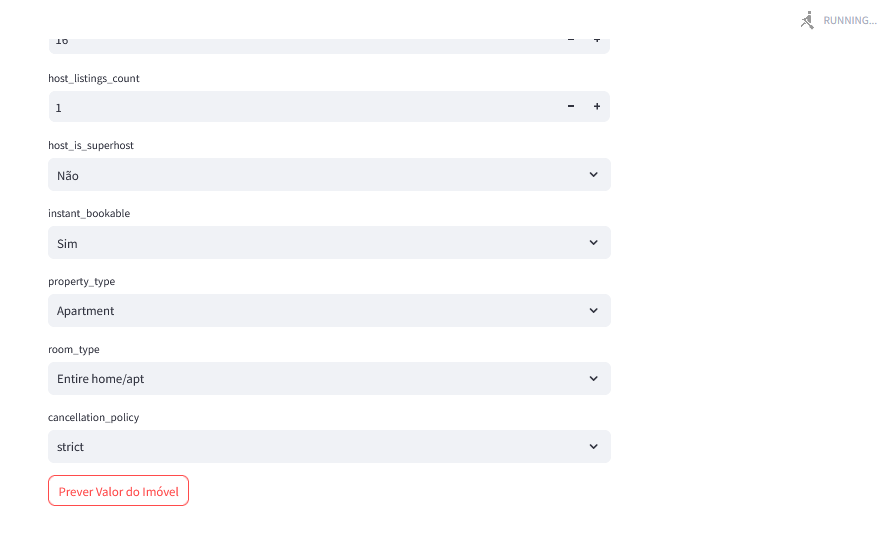

### Prevendo o valor do imóvel com essas características

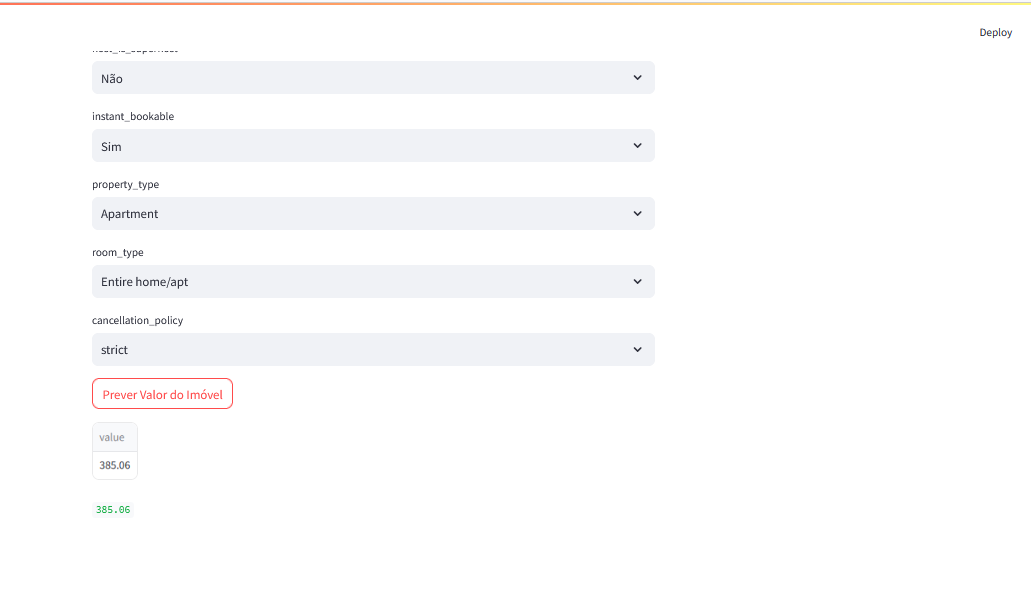

Agora pelo Leblon
lat -22.98431
lon -43.21794

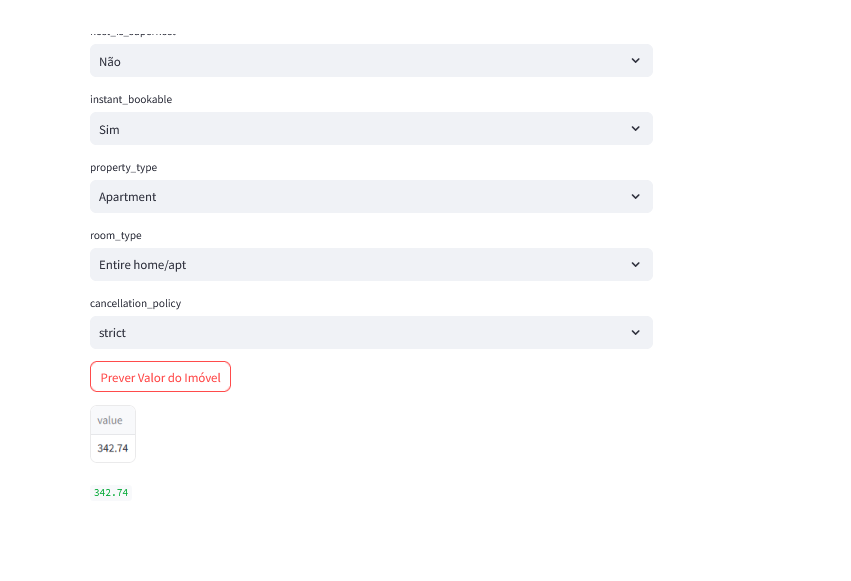

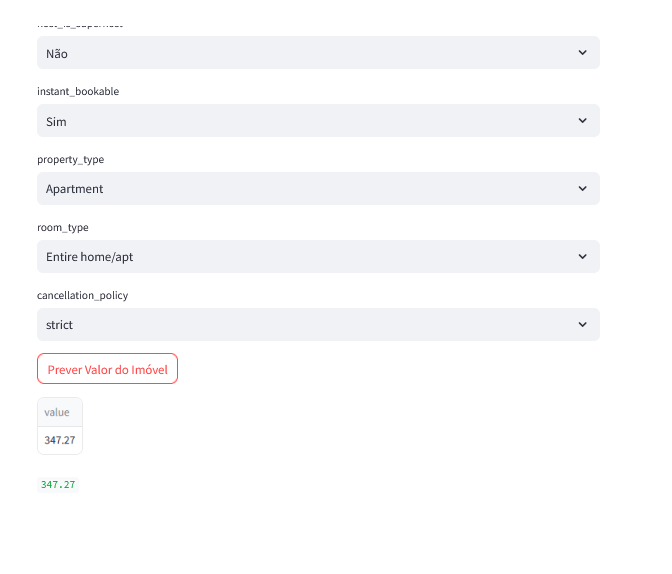

In [ ]:
# bom para prever na média

In [ ]:

#-22.981488736981554, -43.22494358569253

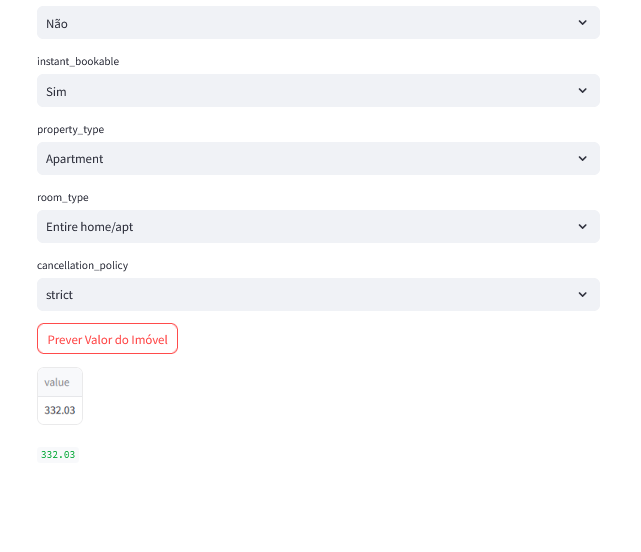

In [ ]:
#-22.986980403794036, -43.2213816120807

In [ ]:
# n_amenities 30 depois 2

In [ ]:
# n_amenities 2


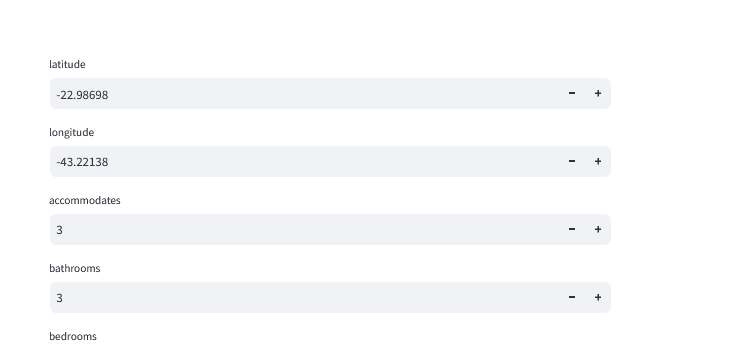
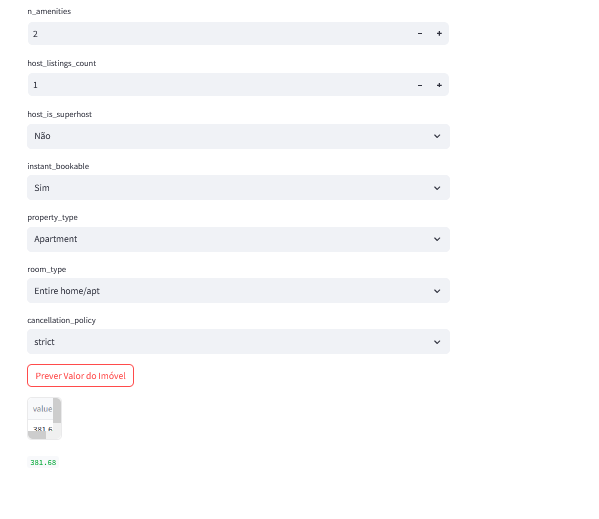

In [ ]:
#sugestão de preço